In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

import umap

from sklearn.manifold import TSNE

from sklearn.manifold import MDS

from sklearn.manifold import Isomap

In [2]:
type_standar = "minmax"
# type_standar = "zscore"

In [3]:
# Cargar los datos
# file_path = 'data/embeddings/df_tfidf_' + type_standar + '.csv'
file_path = 'data/embeddingstrain/df_embeddings_' + type_standar + '.csv'
data = pd.read_csv(file_path, delimiter=',')

In [4]:
data.keys()

Index(['embed_0', 'embed_1', 'embed_2', 'embed_3', 'embed_4', 'embed_5',
       'embed_6', 'embed_7', 'embed_8', 'embed_9',
       ...
       'embed_378', 'embed_379', 'embed_380', 'embed_381', 'embed_382',
       'embed_383', 'ANIO', 'VOLUMEN', 'CUARTIL', 'PAGINAS'],
      dtype='object', length=388)

# Reducción de dimensionalidad

## UMAP

In [5]:
# embeddings = data.drop(columns=['ANIO', 'VOLUMEN', 'CUARTIL', 'PAGINAS'], axis=1)

In [6]:
# reducer = umap.UMAP(n_components=20, metric='cosine')
# embeddings_reduced = reducer.fit_transform(embeddings)

## PCA

In [7]:
scaledNonBinaryVariablesLimpio = data.copy()

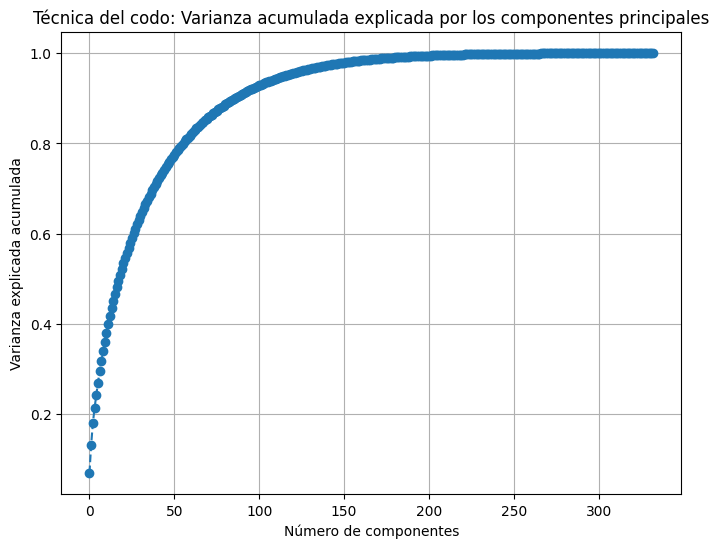

Componente 1: 6.90% de varianza explicada
Componente 2: 6.30% de varianza explicada
Componente 3: 4.75% de varianza explicada
Componente 4: 3.39% de varianza explicada
Componente 5: 2.89% de varianza explicada
Componente 6: 2.71% de varianza explicada
Componente 7: 2.60% de varianza explicada
Componente 8: 2.22% de varianza explicada
Componente 9: 2.17% de varianza explicada
Componente 10: 2.13% de varianza explicada
Componente 11: 2.02% de varianza explicada
Componente 12: 1.95% de varianza explicada
Componente 13: 1.78% de varianza explicada
Componente 14: 1.73% de varianza explicada
Componente 15: 1.63% de varianza explicada
Componente 16: 1.55% de varianza explicada
Componente 17: 1.41% de varianza explicada
Componente 18: 1.38% de varianza explicada
Componente 19: 1.37% de varianza explicada
Componente 20: 1.29% de varianza explicada
Componente 21: 1.23% de varianza explicada
Componente 22: 1.18% de varianza explicada
Componente 23: 1.16% de varianza explicada
Componente 24: 1.14%

In [8]:
# Aplicar PCA sin especificar el número de componentes inicialmente
pca = PCA()
X_pca = pca.fit_transform(scaledNonBinaryVariablesLimpio)

# Calcular el porcentaje de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_

# Generar el gráfico de la técnica del codo
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Técnica del codo: Varianza acumulada explicada por los componentes principales')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

# Mostrar el porcentaje de varianza explicada por cada componente individual
for i, var in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {var * 100:.2f}% de varianza explicada")

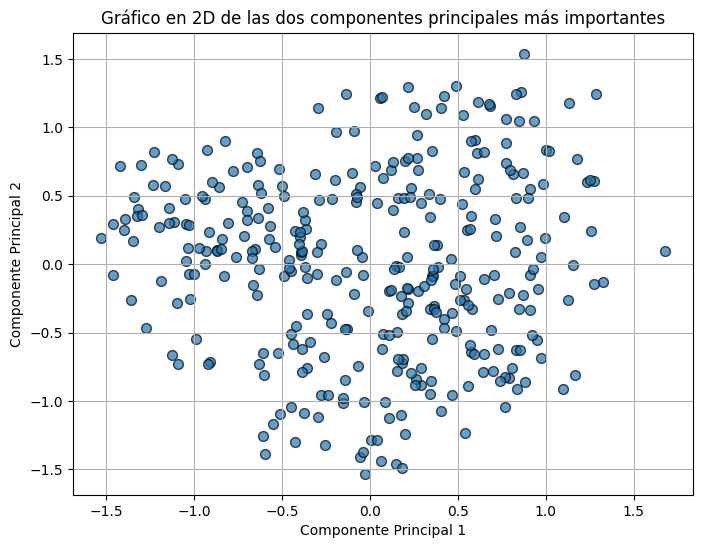

In [9]:
# Aplicar PCA para reducir a 2 dimensiones (componentes)
pca = PCA(n_components=2)

X_pca_2d = pca.fit_transform(scaledNonBinaryVariablesLimpio)

# Graficar las dos componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], edgecolor='k', s=50, alpha=0.7)
plt.title('Gráfico en 2D de las dos componentes principales más importantes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.grid(True)
plt.show()

               embed_0   embed_1   embed_2   embed_3   embed_4   embed_5  \
Componente 1  0.079054 -0.000604  0.038376  0.039281  0.144138 -0.003663   
Componente 2 -0.052874  0.053159  0.012100 -0.007734  0.020227 -0.020903   

               embed_6   embed_7   embed_8   embed_9  ...  embed_378  \
Componente 1  0.034956  0.048166  0.032858  0.044113  ...  -0.007919   
Componente 2 -0.004375  0.001365 -0.033268 -0.051227  ...   0.025793   

              embed_379  embed_380  embed_381  embed_382  embed_383      ANIO  \
Componente 1  -0.045574   0.085924  -0.118234   0.049212  -0.036241  0.050545   
Componente 2  -0.029441  -0.016718  -0.084501   0.090936  -0.021026  0.038197   

               VOLUMEN   CUARTIL   PAGINAS  
Componente 1 -0.005787  0.076507  0.026229  
Componente 2  0.005642  0.062296 -0.001007  

[2 rows x 388 columns]


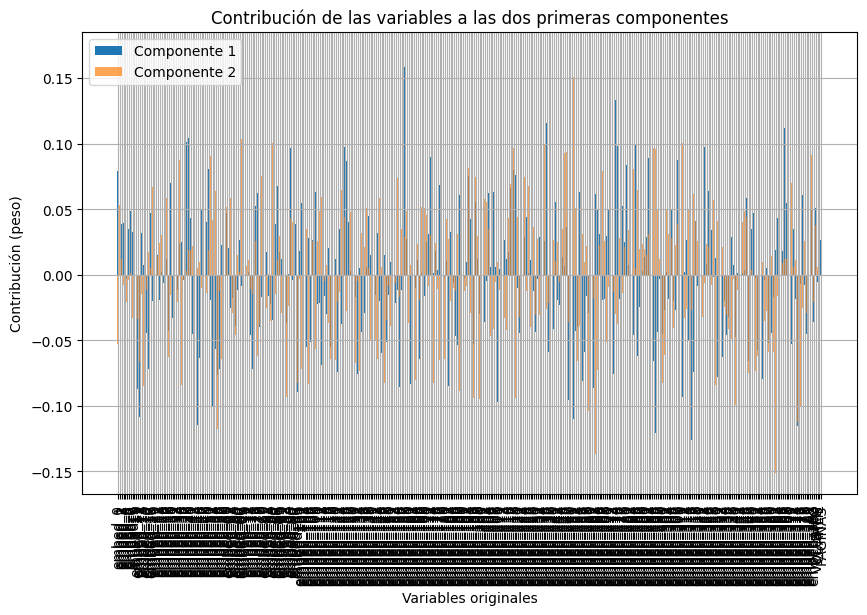

In [10]:
# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
pca.fit(scaledNonBinaryVariablesLimpio)

# Obtener las cargas (pesos) de las variables originales en las dos componentes principales
componentes = pd.DataFrame(pca.components_, columns=scaledNonBinaryVariablesLimpio.columns, index=['Componente 1', 'Componente 2'])

# Mostrar la matriz de cargas
print(componentes)

# Visualizar la contribución de las variables en las dos primeras componentes
plt.figure(figsize=(10, 6))
plt.bar(scaledNonBinaryVariablesLimpio.columns, pca.components_[0], label='Componente 1')
plt.bar(scaledNonBinaryVariablesLimpio.columns, pca.components_[1], label='Componente 2', alpha=0.7)
plt.title('Contribución de las variables a las dos primeras componentes')
plt.xlabel('Variables originales')
plt.ylabel('Contribución (peso)')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.show()

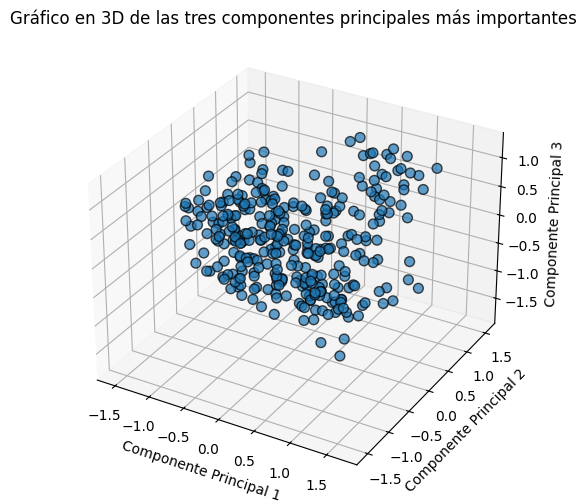

In [11]:
# Aplicar PCA para reducir a 3 dimensiones (componentes)
pca = PCA(n_components=3)
X_pca_3d = pca.fit_transform(scaledNonBinaryVariablesLimpio)

# Crear el gráfico en 3D
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar los datos en función de las tres primeras componentes
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], edgecolor='k', s=50, alpha=0.7)

# Etiquetas y título
ax.set_title('Gráfico en 3D de las tres componentes principales más importantes')
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Mostrar el gráfico
plt.show()

## t-SNE

In [12]:
# scaledNonBinaryVariablesLimpio = data.copy()

c:\Users\saraujo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
C:\Users\saraujo\AppData\Local\Temp\ipykernel_15768\2625405484.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_result[:,0], tsne_result[:,1], cmap='viridis')


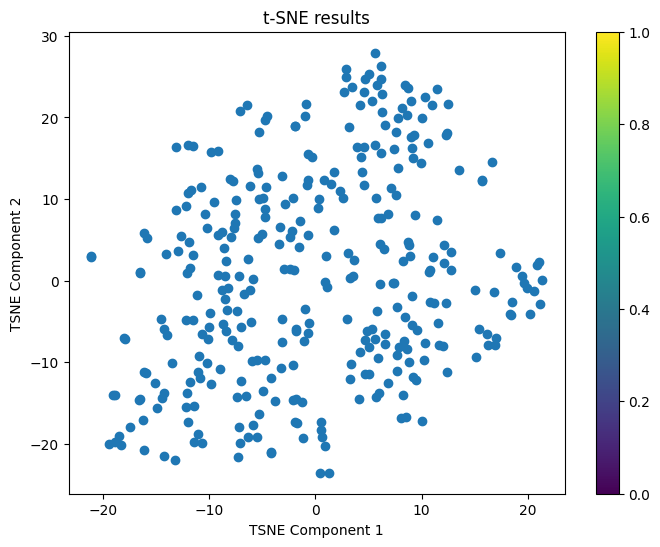

In [13]:
# Aplicar t-SNE
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_result = tsne.fit_transform(scaledNonBinaryVariablesLimpio)

# # Añadir los resultados de t-SNE al DataFrame
# scaledNonBinaryVariablesLimpio['tsne-2d-one'] = tsne_result[:,0]
# scaledNonBinaryVariablesLimpio['tsne-2d-two'] = tsne_result[:,1]

# Visualizar los resultados
plt.figure(figsize=(8,6))
# plt.scatter(scaledNonBinaryVariablesLimpio['tsne-2d-one'], scaledNonBinaryVariablesLimpio['tsne-2d-two'], cmap='viridis')
plt.scatter(tsne_result[:,0], tsne_result[:,1], cmap='viridis')
plt.colorbar()
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('t-SNE results')
plt.show()

## MDS

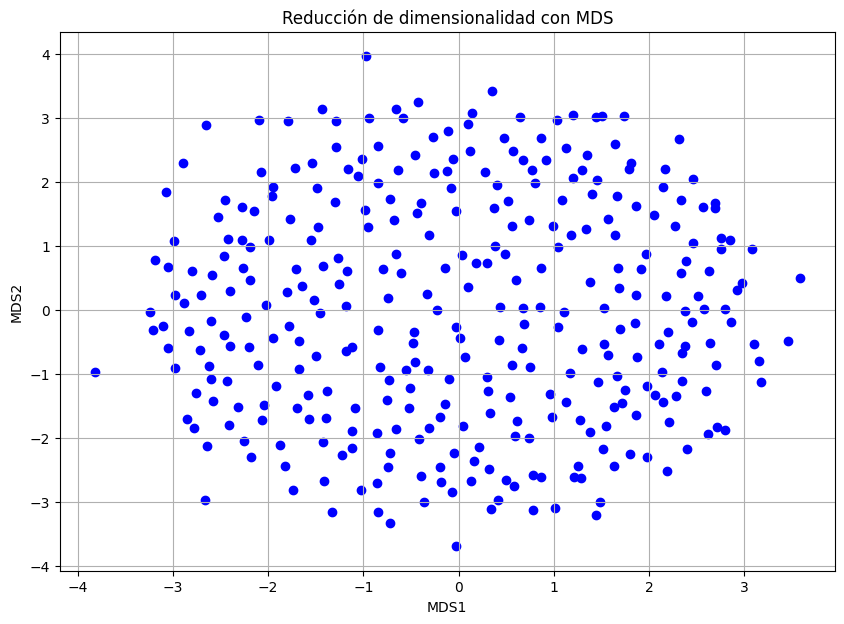

In [14]:
mds = MDS(n_components=2, random_state=42)  # Reducimos a 2 dimensiones para visualización
data_mds = mds.fit_transform(scaledNonBinaryVariablesLimpio)

# Convertir a un DataFrame para facilitar la visualización
df_mds = pd.DataFrame(data_mds, columns=['MDS1', 'MDS2'])

# Visualización de los datos en el espacio reducido
plt.figure(figsize=(10, 7))
plt.scatter(df_mds['MDS1'], df_mds['MDS2'], color='blue')
plt.title('Reducción de dimensionalidad con MDS')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.grid()
plt.show()

## Isomap

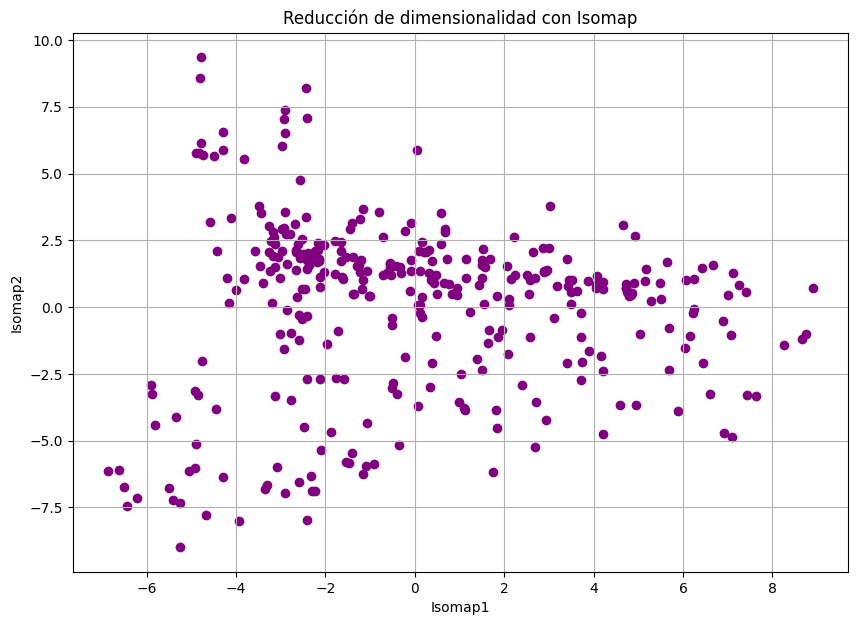

In [15]:
# Configurar y aplicar Isomap
isomap = Isomap(n_components=2)  # Reducimos a 2 dimensiones para visualización
data_isomap = isomap.fit_transform(scaledNonBinaryVariablesLimpio)

# Convertir el resultado a un DataFrame
df_isomap = pd.DataFrame(data_isomap, columns=['Isomap1', 'Isomap2'])

# Visualizar el resultado de Isomap
plt.figure(figsize=(10, 7))
plt.scatter(df_isomap['Isomap1'], df_isomap['Isomap2'], color='purple')
plt.title('Reducción de dimensionalidad con Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.grid()
plt.show()

# View

In [16]:
X_pca.shape

(333, 333)

In [17]:
X_pca_2d.shape

(333, 2)

In [18]:
X_pca_3d.shape

(333, 3)

In [19]:
tsne_result.shape

(333, 2)

In [20]:
data_mds.shape, df_mds.shape, type(data_mds), type(df_mds)

((333, 2), (333, 2), numpy.ndarray, pandas.core.frame.DataFrame)

In [21]:
data_isomap.shape, df_isomap.shape, type(data_isomap), type(df_isomap)

((333, 2), (333, 2), numpy.ndarray, pandas.core.frame.DataFrame)

In [22]:
arrays_to_join = [X_pca_2d, X_pca_3d, tsne_result, data_mds, data_isomap]
joined_array = np.concatenate(arrays_to_join, axis=1)
print(joined_array.shape)

(333, 11)


In [23]:
df_dim = pd.DataFrame(joined_array, columns=['X_pca_2d_1', 'X_pca_2d_2', 'X_pca_3d_1', 'X_pca_3d_2', 'X_pca_3d_3', 'tsne_result_1', 'tsne_result_2', 'data_mds_1', 'data_mds_2', 'data_isomap_1', 'data_isomap_2'])

In [24]:
df_dim.head()

,X_pca_2d_1,X_pca_2d_2,X_pca_3d_1,X_pca_3d_2,X_pca_3d_3,tsne_result_1,tsne_result_2,data_mds_1,data_mds_2,data_isomap_1,data_isomap_2
0,-0.394077,0.063113,-0.394077,0.063113,0.251726,-1.939579,-17.337658,-1.019385,2.368571,5.890600,-3.903852
1,0.527097,1.089638,0.527097,1.089638,0.408916,10.616753,16.925472,2.800187,0.015151,-1.481175,-5.822447
2,0.319094,1.100580,0.319094,1.100580,0.377761,9.219580,15.009484,-3.189933,0.784980,-3.317806,-6.674443
3,0.291322,0.445351,0.291322,0.445351,0.295924,9.902867,14.434706,-2.406429,0.292794,-2.472199,-4.505318
4,-0.640456,0.339833,-0.640456,0.339833,1.105263,0.581208,-19.201382,-2.095233,2.979929,2.392982,-2.905791


In [25]:
df_dim.to_csv("data/embeddingstrain/reduce.csv", index=False)